# Breast Cancer Detection using ML Model

## Import Libraries

In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,ConfusionMatrixDisplay

## Load Dataset

In [23]:
breast_cancer = fetch_ucirepo(id=17)
X = breast_cancer.data.features
y = breast_cancer.data.targets.squeeze()

## Exploratory Data Analysis (EDA)

In [24]:
eda_summary = {
    "Head": X.head(),
    "Shape": X.shape,
    "Missing Values": X.isnull().sum().sum(),
    "Target Distribution": y.value_counts(),
    "Feature Correlation": X.corr()
}
eda_summary

{'Head':    radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
 0    17.99     10.38      122.80  1001.0      0.11840       0.27760   
 1    20.57     17.77      132.90  1326.0      0.08474       0.07864   
 2    19.69     21.25      130.00  1203.0      0.10960       0.15990   
 3    11.42     20.38       77.58   386.1      0.14250       0.28390   
 4    20.29     14.34      135.10  1297.0      0.10030       0.13280   
 
    concavity1  concave_points1  symmetry1  fractal_dimension1  ...  radius3  \
 0      0.3001          0.14710     0.2419             0.07871  ...    25.38   
 1      0.0869          0.07017     0.1812             0.05667  ...    24.99   
 2      0.1974          0.12790     0.2069             0.05999  ...    23.57   
 3      0.2414          0.10520     0.2597             0.09744  ...    14.91   
 4      0.1980          0.10430     0.1809             0.05883  ...    22.54   
 
    texture3  perimeter3   area3  smoothness3  compactness3  concavity3  \
 

## Target Distribution

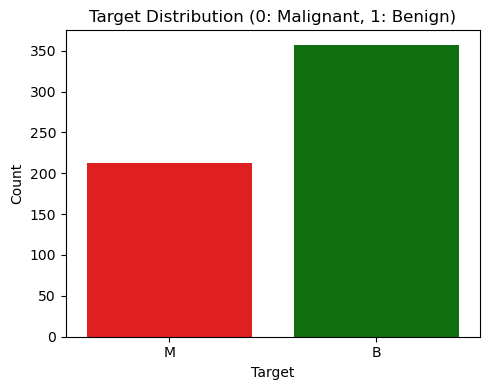

In [25]:
plt.figure(figsize=(5, 4))
sns.countplot(x=y, palette=["red", "green"])
plt.title("Target Distribution (0: Malignant, 1: Benign)")
plt.xlabel("Target")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

## Heatmap of feature correlations

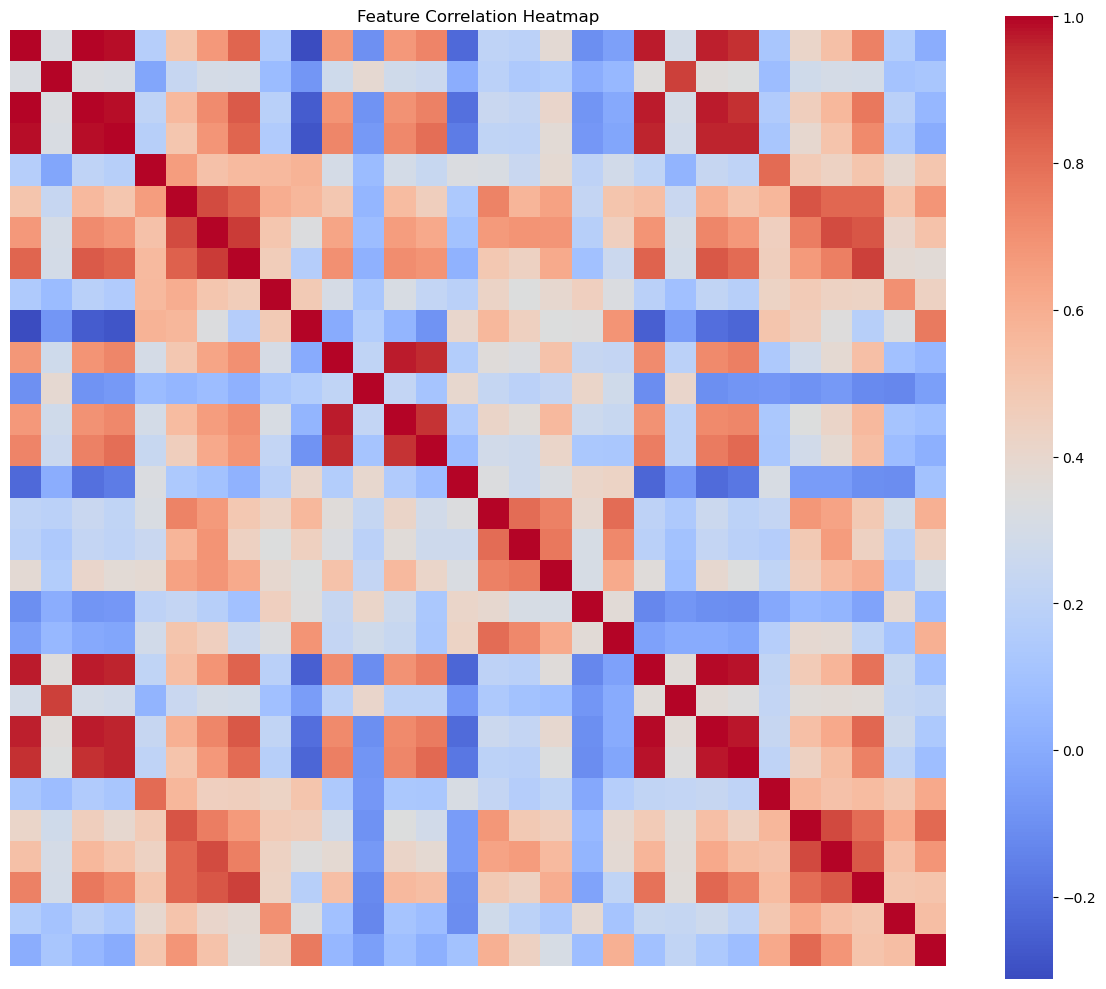

In [26]:
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), cmap='coolwarm', square=True, cbar=True, xticklabels=False, yticklabels=False)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

In [27]:
corr_matrix = X.corr()
corr_pairs = corr_matrix.unstack()
# Drop self-correlations
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]
# Sort and get top pairs
sorted_corr = corr_pairs.sort_values(ascending=False)
top_corr = sorted_corr.drop_duplicates().head(10)
print(top_corr)


perimeter1  radius1       0.997855
perimeter3  radius3       0.993708
radius1     area1         0.987357
area1       perimeter1    0.986507
radius3     area3         0.984015
perimeter3  area3         0.977578
perimeter2  radius2       0.972794
perimeter3  perimeter1    0.970387
radius3     radius1       0.969539
perimeter1  radius3       0.969476
dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

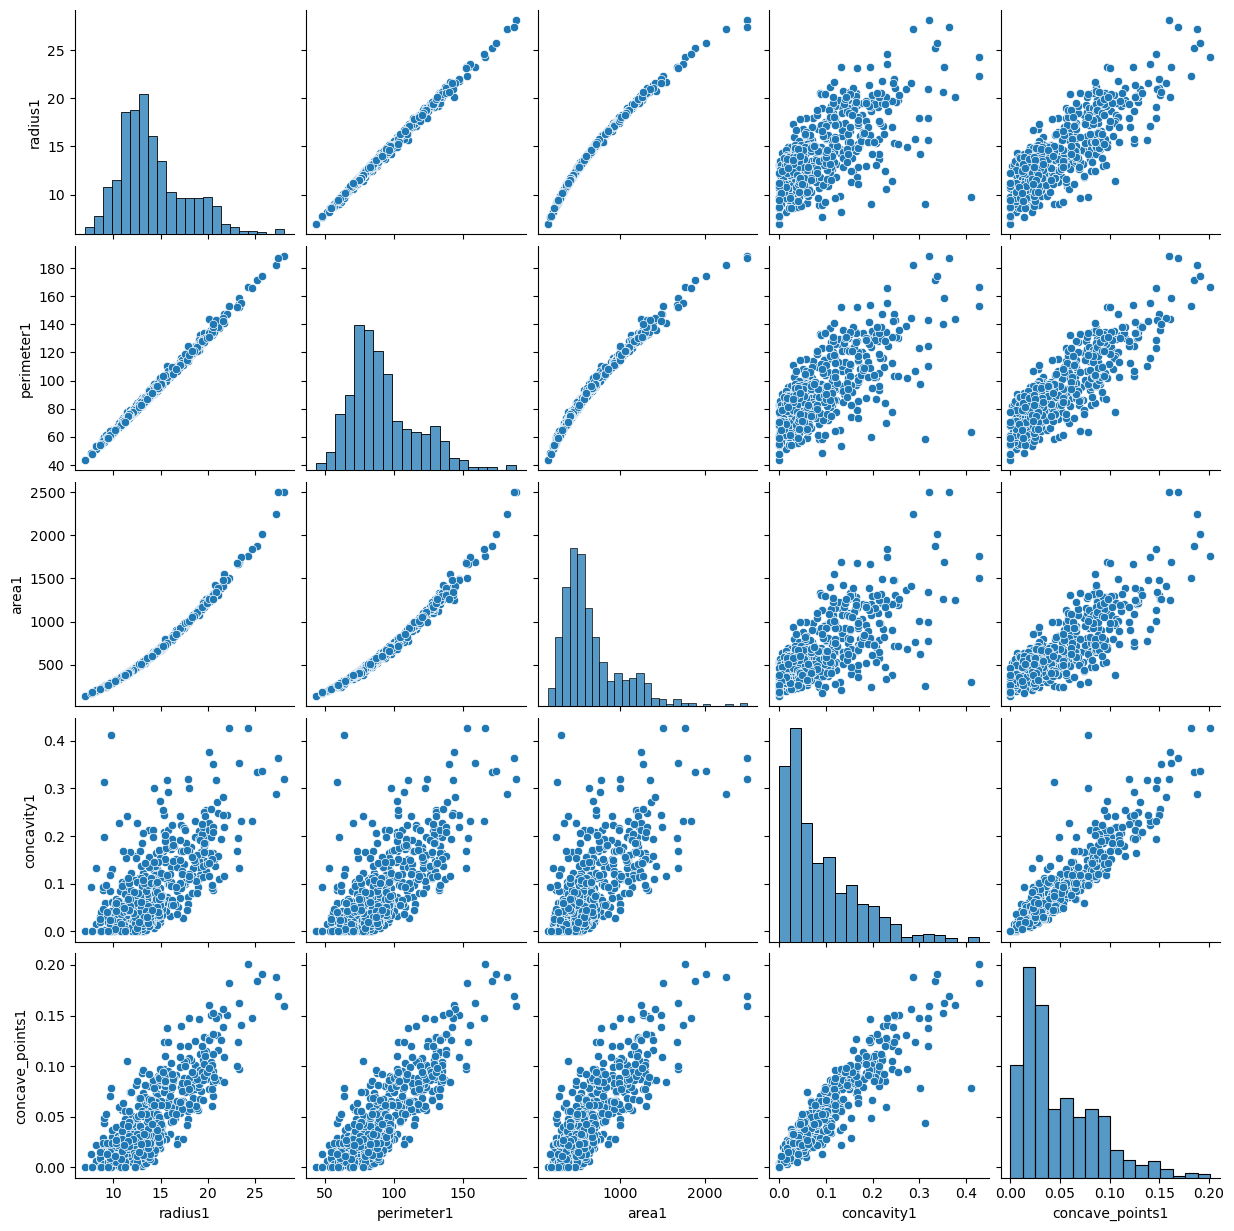

In [28]:
top_features = ['radius1', 'perimeter1', 'area1', 'concavity1', 'concave_points1']
sns.pairplot(X[top_features])
plt.show()

## Train-Test Split and Scaling

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Function to evaluate models

In [30]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return {
        "Model": model.__class__.__name__,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Report": classification_report(y_test, y_pred, output_dict=True),
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }

## Initialize models

In [31]:
models = [
    LogisticRegression(max_iter=1000),
    GaussianNB(),
    RandomForestClassifier(random_state=42),
    SVC(kernel='linear', probability=True)
]
results = [evaluate_model(m, X_train_scaled, X_test_scaled, y_train, y_test) for m in models]

## Summary

In [32]:
summary_df = pd.DataFrame({
    "Model": [res["Model"] for res in results],
    "Accuracy": [res["Accuracy"] for res in results],
    "Precision (Macro)": [res["Report"]["macro avg"]["precision"] for res in results],
    "Recall (Macro)": [res["Report"]["macro avg"]["recall"] for res in results],
    "F1-Score (Macro)": [res["Report"]["macro avg"]["f1-score"] for res in results]
})
summary_df

,Model,Accuracy,Precision (Macro),Recall (Macro),F1-Score (Macro)
0,LogisticRegression,0.964912,0.967230,0.957341,0.961911
1,GaussianNB,0.921053,0.921538,0.907738,0.913832
2,RandomForestClassifier,0.973684,0.980000,0.964286,0.971277
3,SVC,0.964912,0.973684,0.952381,0.961486


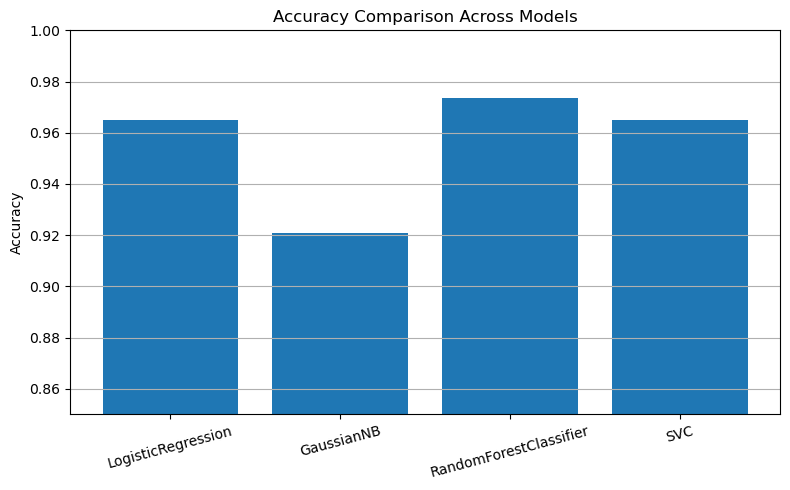

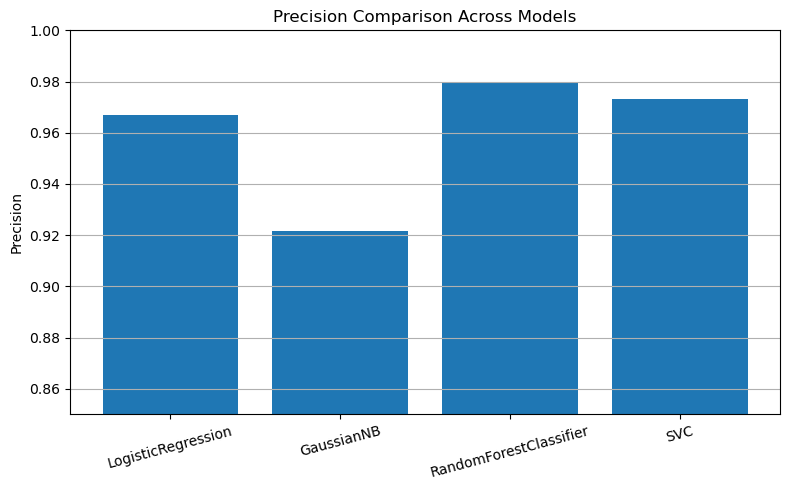

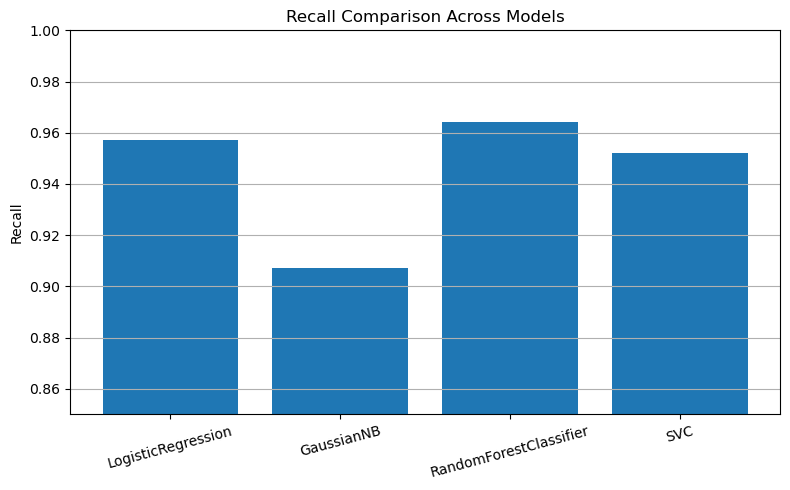

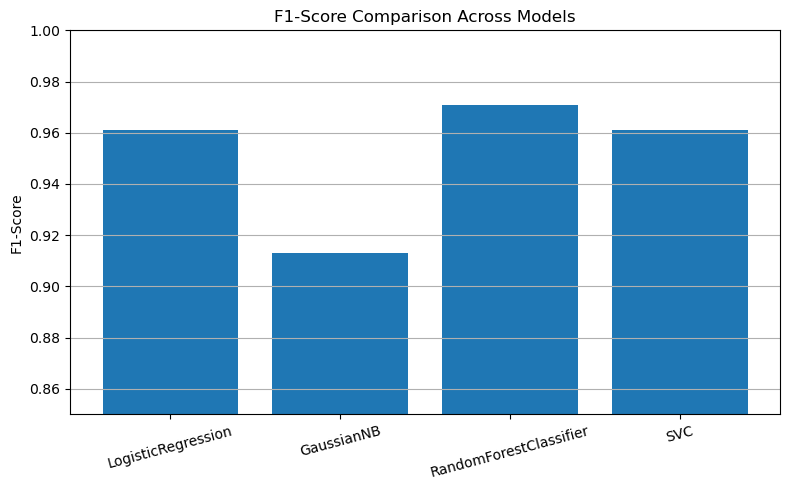

In [35]:
data = {
    "Model": ["LogisticRegression", "GaussianNB", "RandomForestClassifier", "SVC"],
    "Accuracy": [0.9649, 0.9210, 0.9737, 0.9649],
    "Precision": [0.967, 0.9215, 0.98, 0.973],
    "Recall": [0.957, 0.907, 0.964, 0.952],
    "F1-Score": [0.961, 0.913, 0.971, 0.961]}
df = pd.DataFrame(data)
# Plotting
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
for metric in metrics:
    plt.figure(figsize=(8, 5))
    plt.bar(df["Model"], df[metric])
    plt.title(f"{metric} Comparison Across Models")
    plt.ylabel(metric)
    plt.xticks(rotation=15)
    plt.ylim(0.85, 1.0)
    plt.tight_layout()
    plt.grid(axis='y')
    plt.show()

## Confusion matrix of most accurate model

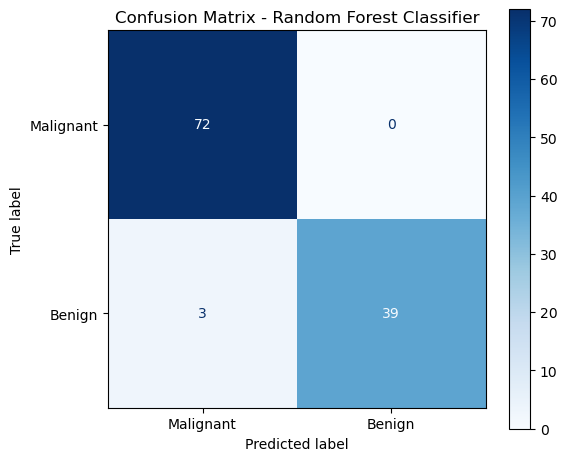

In [19]:
conf_matrix = np.array([[72, 0], [3, 39]])  # [TN, FP], [FN, TP]
class_names = ["Malignant", "Benign"]

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
fig, ax = plt.subplots(figsize=(6, 5))
disp.plot(cmap="Blues", values_format="d", ax=ax)
plt.title("Confusion Matrix - Random Forest Classifier")
plt.tight_layout()
plt.show()

## Interpretation

72 true negatives: Correctly predicted malignant tumors

36 true positives: Correctly predicted benign tumors

3 false negatives: Misclassified 3 benign tumors as malignant

0 false positives: No malignant tumors misclassified as benign (very important in cancer detection!)